# Homework 03 - Nonstandard Evaluation and Git

## Nonstandard Evaluation


### Question 1
Imagine we have a data frame called `data`, with a `type` column. Which one works and why?\
Function 1:
```
group_and_tally <- function(df, column){
    df %>% group_by({{ column }}) %>% tally();
}
group_and_tally(data, type);
```

Function 2:
```
group_and_tally <- function(df, column){
    df %>% group_by(column) %>% tally();
}
group_and_tally(data, type);
```

**Function 1 works because of the group_by({{column}}) as opposed to the group_by(column) in function 2. This is because in function 2, it will try to use column as a literal variable and not the column name in the data frame.**

## Git
For the questions below, please add the commands you used to complete these steps.

### Question 2
Set up your git repo on your local computer. If you already make a git repo on GitHub, but it isn’t on your local computer - clone it.

**git clone git@github.com:dvtailor03/bios-repo.git <br>
cd bios-repo**

### Question 3
Set up your SSH key.

**ssh-keygen -t ed25519 -C "dvtailor@unc.edu" <br>
pbcopy < ~/.ssh/id_ed25519.pub**



### Question 4
a) Add a HW2 directory to your git repo through the terminal with a HW.md file that says "This is for homework 2."


**mkdir HW2 <br>
echo "This is for homework 2." > HW2/HW2.md**

b) *Add* HW2.md to the staging area. Then, use the command to see which files have been modified, staged for commit, or are untracked. What does it show?
They should copy paste the terminal response after git status, and show that key used the commands below.

**Command: <br>
git add HW2/HW2.md <br>
git status**

**Output: <br>
On branch main <br>
Your branch is up to date with 'origin/main'. <br>
Changes to be committed: <br>
  (use "git restore --staged <file>..." to unstage) <br>
	new file:   HW2/HW2.md <br>**

c) Save file changes to the main branch.

**git commit -m "Add HW2 directory with HW2.md"**

d) Now, edit the HW2.md file to give it a title.

**echo "# Homework 2" > HW2/HW2.md**



e) Use the command that compares current, unsaved changes to the main branch. What does it say?


**command: git diff <br> Output: <br>
diff --git a/HW2/HW2.md b/HW2/HW2.md <br>
index 1a010d3..e4e6b4d 100644 <br>
--- a/HW2/HW2.md<br>
+++ b/HW2/HW2.md<br>
@@ -1 +1 @@<br>
-This is for homework 2.<br>
+# Homework 2<br>**


f) Use the command that checks the status of the working directory and the staging area *again*. What does it say?

**Command: git status** <br>

**Output:** <br>
**On branch main<br>
Your branch is ahead of 'origin/main' by 1 commit.<br>
(use "git push" to publish your local commits) <br>**
**Changes not staged for commit:<br>
(use "git add <file>..." to update what will be committed)<br>
(use "git restore <file>..." to discard changes in working directory)<br> modified:   HW2/HW2.md<br>**
**no changes added to commit (use "git add" and/or "git commit -a")**

g) Once again, add HW2.md to the staging area and save the file changes to the main branch. Then, get use the command that gives you project history and paste the output in your homework.

**Command:git add HW2/HW2.md <br>
git commit -m "Update HW2.md with title" <br>
git log --oneline**

**Output: [main 2159838] Update HW2.md with title <br>
 1 file changed, 1 insertion(+), 1 deletion(-) <br>
2159838 (HEAD -> main) Update HW2.md with title <br>
bb67158 Add HW2 directory with HW2.md <br>
b3f301f (origin/main) initial commit**


h) Do some searching... What `git` command will provide you documentation on other commands? Use that command to find documentation on `git log` and `git show`. What does `--since` mean in regards to `git log`? Copy and paste what is written in the documentation.

**a) git help <br>
b) Based on the documentation for --since in regards to git log means <br> --since=<date>, --after=<date> <br>
           Show commits more recent than a specific date.**


## Tidyverse

Note: Please make sure Binder is set up correctly to run this section. You can follow the instructions here: https://github.com/rjenki/BIOS512.

**Please show your code for this section!** Before completing this section, please run the following.

In [78]:
library(tidyverse)
if (!dir.exists("intermediate")) dir.create("intermediate", recursive = TRUE)
if (!exists("mdpre")) mdpre <- function(x) { print(x) }
if (!exists("ggmd"))  ggmd  <- function(p) { print(p) }

### Question 5

Download the patient_names.csv and patient_properties.csv files from Canvas and read them into R. Manually set the date columns to be date variables. Print the first 10 observations of each.

In [79]:
names <- read_csv("patient_names.csv")
props <- read_csv("patient_properties.csv")


fix_dates <- function(x, col_name) {
  if (col_name %in% c("BIRTHDATE","DEATHDATE")) {
    x <- as.Date(x, format = "%m/%d/%y")
    x <- if_else(!is.na(x) & x > as.Date("2020-01-01"),
                 x - years(100),
                 x)
  }
  return(x)
}


names <- names |>
  mutate(BIRTHDATE = fix_dates(BIRTHDATE, "BIRTHDATE"),
          DEATHDATE = as.Date(DEATHDATE, format = "%m/%d/%y"))


head(names,10)
head(props,10)

Rows: 974 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ID, BIRTHDATE, DEATHDATE, FIRST, LAST, CITY, STATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3896 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): ID, property, value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts
6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts
8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts
770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Abel832,Smitham825,Boston,Massachusetts
f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Edwin773,Labadie908,Boston,Massachusetts
8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts
183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts
720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts
217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts


ID,property,value
<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,MARITAL,M
5605b66b-e92d-c16c-1b83-b8bf7040d51f,RACE,white
5605b66b-e92d-c16c-1b83-b8bf7040d51f,ETHNICITY,nonhispanic
5605b66b-e92d-c16c-1b83-b8bf7040d51f,GENDER,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,MARITAL,M
6e5ae27c-8038-7988-e2c0-25a103f01bfa,RACE,white
6e5ae27c-8038-7988-e2c0-25a103f01bfa,ETHNICITY,nonhispanic
6e5ae27c-8038-7988-e2c0-25a103f01bfa,GENDER,M
8123d076-0886-9007-e956-d5864aa121a7,MARITAL,M


### Question 6
In the data frame pulled from patient_properties, you'll notice that the data is long, not wide. Do a pivot to make the properties their own columns. Print the first 10 observations after you do so.

In [80]:
props_wide <- props |>
  pivot_wider(
    names_from = property,
    values_from = value
  )

head(props_wide,10)

ID,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,S,black,hispanic,M


### Question 7
Perform a left join of the names and properties_wide data frames by the ID column and print the first 10 rows.

In [81]:
join_npw <- left_join(names, props_wide, by = "ID")

head(join_npw, 10)

ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita578,Erdman779,Quincy,Massachusetts,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NA,Zane918,Hodkiewicz467,Boston,Massachusetts,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NA,Quinn173,Marquardt819,Quincy,Massachusetts,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Abel832,Smitham825,Boston,Massachusetts,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Edwin773,Labadie908,Boston,Massachusetts,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NA,Frankie174,Oberbrunner298,Boston,Massachusetts,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NA,Eilene124,Walsh511,Cambridge,Massachusetts,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell343,Price929,Quincy,Massachusetts,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NA,Adrian111,Gleason633,Boston,Massachusetts,S,black,hispanic,M


### Question 8
Notice something interesting about the names in our data set. Fix the name formatting and print the first 10 observations.

**The names both first and last in the data set are followed by 3 trailing numeric values.**

In [82]:
join_npw <- join_npw |>
  mutate(
    FIRST = substr(FIRST, 1, nchar(FIRST) - 3),
    LAST  = substr(LAST, 1, nchar(LAST) - 3)
  )

head(join_npw, 10)

ID,BIRTHDATE,DEATHDATE,FIRST,LAST,CITY,STATE,MARITAL,RACE,ETHNICITY,GENDER
<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NA,Nikita,Erdman,Quincy,Massachusetts,M,white,nonhispanic,F
6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NA,Zane,Hodkiewicz,Boston,Massachusetts,M,white,nonhispanic,M
8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NA,Quinn,Marquardt,Quincy,Massachusetts,M,white,nonhispanic,M
770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Abel,Smitham,Boston,Massachusetts,M,white,hispanic,M
f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Edwin,Labadie,Boston,Massachusetts,M,white,hispanic,M
8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NA,Frankie,Oberbrunner,Boston,Massachusetts,M,white,hispanic,M
183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NA,Eilene,Walsh,Cambridge,Massachusetts,M,asian,nonhispanic,F
720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NA,Lowell,Price,Quincy,Massachusetts,M,white,nonhispanic,M
217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NA,Adrian,Gleason,Boston,Massachusetts,S,black,hispanic,M


### Question 9
Using a for statement to loop through the categorical variables (excluding name and ID), print the counts of each unique value in descending order, using the mdpre() function for formatting.

In [83]:
cat_cols <- c("CITY","STATE", "MARITAL","RACE","ETHNICITY","GENDER")

for(col in cat_cols) {
  cat("\nColumn:", col, "\n")
  mdpre(join_npw |>
     group_by(across(all_of(col))) |>
      tally() |>
       arrange(desc(n)))
}



Column: CITY 
# A tibble: 29 × 2
   CITY           n
   <chr>      <int>
 1 Boston       541
 2 Quincy        80
 3 Cambridge     45
 4 Revere        42
 5 Chelsea       39
 6 Weymouth      37
 7 Somerville    25
 8 Hingham       22
 9 Winthrop      22
10 Brookline     17
# ℹ 19 more rows

Column: STATE 
# A tibble: 1 × 2
  STATE             n
  <chr>         <int>
1 Massachusetts   974

Column: MARITAL 
# A tibble: 5 × 2
  MARITAL     n
  <chr>   <int>
1 M         782
2 S         189
3 Fine        1
4 male        1
5 NA          1

Column: RACE 
# A tibble: 7 × 2
  RACE         n
  <chr>    <int>
1 white      680
2 black      163
3 asian       90
4 other       16
5 hawaiian    13
6 native      11
7 asiann       1

Column: ETHNICITY 
# A tibble: 4 × 2
  ETHNICITY       n
  <chr>       <int>
1 nonhispanic   781
2 hispanic      190
3 nonhispani      2
4 hispani         1

Column: GENDER 
# A tibble: 5 × 2
  GENDER     n
  <chr>  <int>
1 M        493
2 F        478
3 Female     1
4 Male 

### Question 10
If you see any weird values, get rid of the ones that don't make sense, and combine the ones that are formatted wrong. Don't forget ot check the dates! Print the new tables for categorical values, and print the date ranges.

In [84]:
joined_clean <- join_npw |>
  mutate(
    MARITAL = case_when(
      MARITAL %in% c("M","S") ~ MARITAL,
      TRUE ~ "NA"
    ),

    RACE = case_when(
      str_to_lower(RACE) %in% c("white") ~ "white",
      str_to_lower(RACE) %in% c("black") ~ "black",
      str_to_lower(RACE) %in% c("asian","asiann") ~ "asian",
      str_to_lower(RACE) %in% c("other","hawaiian","native") ~ "other",
      TRUE ~ "NA"
    ),

    ETHNICITY = case_when(
      str_to_lower(ETHNICITY) %in% c("nonhispanic","nonhispani") ~ "nonhispanic",
      str_to_lower(ETHNICITY) %in% c("hispanic","hispani") ~ "hispanic",
      TRUE ~ "NA"
    ),

    GENDER = case_when(
      str_to_lower(GENDER) %in% c("m","male") ~ "M",
      str_to_lower(GENDER) %in% c("f","female") ~ "F",
      TRUE ~ "NA"
    )
  )

cat_cols <- c("CITY","STATE","MARITAL","RACE","ETHNICITY","GENDER")
for(col in cat_cols) {
  cat("\nColumn:", col, "\n")
  mdpre(joined_clean |>
     group_by(across(all_of(col))) |>
      tally() |>
       arrange(desc(n)))
}

cat("\nBIRTHDATE range:\n")
mdpre(range(joined_clean$BIRTHDATE, na.rm = TRUE))
cat("\nDEATHDATE range:\n")
mdpre(range(joined_clean$DEATHDATE, na.rm = TRUE))




Column: CITY 
# A tibble: 29 × 2
   CITY           n
   <chr>      <int>
 1 Boston       541
 2 Quincy        80
 3 Cambridge     45
 4 Revere        42
 5 Chelsea       39
 6 Weymouth      37
 7 Somerville    25
 8 Hingham       22
 9 Winthrop      22
10 Brookline     17
# ℹ 19 more rows

Column: STATE 
# A tibble: 1 × 2
  STATE             n
  <chr>         <int>
1 Massachusetts   974

Column: MARITAL 
# A tibble: 3 × 2
  MARITAL     n
  <chr>   <int>
1 M         782
2 S         189
3 NA          3

Column: RACE 
# A tibble: 4 × 2
  RACE      n
  <chr> <int>
1 white   680
2 black   163
3 asian    91
4 other    40

Column: ETHNICITY 
# A tibble: 2 × 2
  ETHNICITY       n
  <chr>       <int>
1 nonhispanic   783
2 hispanic      191

Column: GENDER 
# A tibble: 2 × 2
  GENDER     n
  <chr>  <int>
1 M        494
2 F        480

BIRTHDATE range:
[1] "1922-03-24" "1991-11-27"

DEATHDATE range:
[1] "2011-02-03" "2022-01-27"


### Question 11
Make a histogram of the ages of patients by gender.

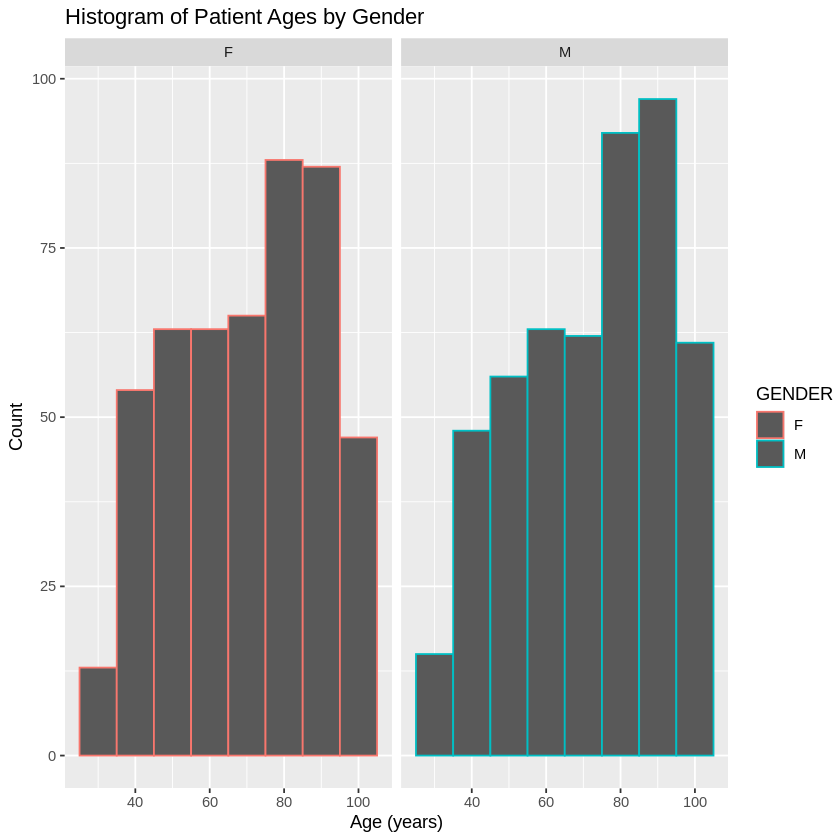

In [91]:

joined_clean <- joined_clean |>
  mutate(
  AGE = as.integer(
      if_else(!is.na(DEATHDATE),
              floor(interval(BIRTHDATE, DEATHDATE) / years(1)),
              floor(interval(BIRTHDATE, Sys.Date()) / years(1)))
  )
)

ggplot(joined_clean, aes(x = AGE, color = GENDER)) +
  geom_histogram(binwidth = 10) +
  labs(title = "Histogram of Patient Ages by Gender",
       x = "Age (years)",
       y = "Count") +
         facet_wrap(~GENDER)



### Question 12
Make a scatterplot of birthdate by martial status.

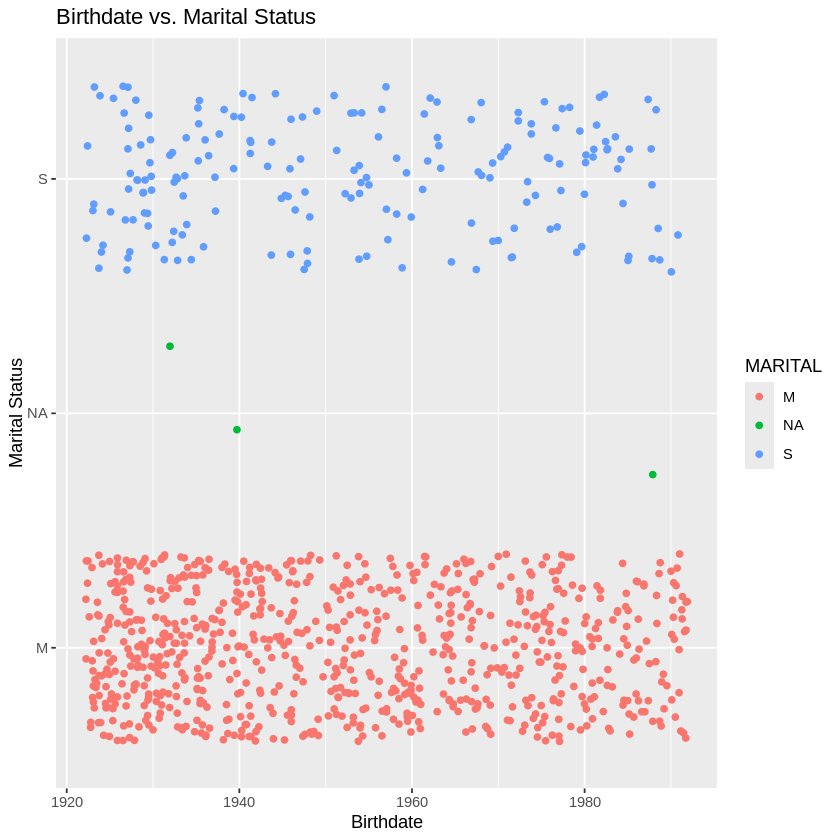

In [86]:
ggplot(joined_clean, aes(x = BIRTHDATE, y = MARITAL, color=MARITAL)) +
  geom_jitter() +
  labs(title = "Birthdate vs. Marital Status",
       x = "Birthdate",
       y = "Marital Status")